In [1]:
import warnings 
warnings.filterwarnings("ignore")
import sys
import os
sys.path.append(os.path.abspath("../"))
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
plt.style.use('ggplot')
from tqdm import tqdm
from synthdid.model import SynthDID

In [2]:
df = pd.read_excel("C:/Users/ferna/Downloads/arrecadacaorestrito.xlsx") 
df.head ()

,City,Year,arrecadacao,Treated
0,Abatiá (PR),2009,70597.00,0
1,Adrianópolis (PR),2009,54508.00,0
2,Agudos do Sul (PR),2009,58950.00,0
3,Almirante Tamandaré (PR),2009,23064963.67,0
4,Altamira do Paraná (PR),2009,34661.00,0


In [3]:
data = df.pivot("Year", "City", "arrecadacao")
data = data.dropna(axis=1)
data.head().round()

City,Abatiá (PR),Adrianópolis (PR),Agudos do Sul (PR),Almirante Tamandaré (PR),Altamira do Paraná (PR),Alto Paraná (PR),Alto Paraíso (PR),Alto Piquiri (PR),Altônia (PR),Alvorada do Sul (PR),...,União da Vitória (PR),Uraí (PR),Ventania (PR),Vera Cruz do Oeste (PR),Verê (PR),Virmond (PR),Vitorino (PR),Wenceslau Braz (PR),Xambrê (PR),Ângulo (PR)
Year,,,,,,,,,,,,,,,,,,,,,
2009,70597.0,54508.0,58950.0,23064964.0,34661.0,101771.0,95392.0,104527.0,134024.0,101370.0,...,1318973.0,19679.0,195670.0,132539.0,101229.0,51200.0,43524.0,103696.0,133786.0,31004.0
2010,80854.0,68096.0,87126.0,29679033.0,37391.0,138443.0,102765.0,117324.0,157302.0,114655.0,...,1467371.0,28625.0,193932.0,149618.0,111267.0,62930.0,53426.0,108860.0,134402.0,40542.0
2011,116849.0,73919.0,87229.0,37504419.0,42075.0,157982.0,123808.0,140214.0,174462.0,136124.0,...,1709746.0,36749.0,225308.0,167969.0,128108.0,52270.0,58991.0,132188.0,178240.0,45714.0
2012,101301.0,84216.0,96333.0,51800104.0,46992.0,202734.0,136531.0,156151.0,193178.0,175129.0,...,2165370.0,42475.0,267627.0,193478.0,132682.0,55053.0,62621.0,156645.0,194958.0,51010.0
2013,124171.0,105919.0,120029.0,61691092.0,55343.0,247599.0,191649.0,204894.0,238554.0,192205.0,...,2464086.0,49643.0,332011.0,232739.0,198307.0,53910.0,84751.0,185555.0,306531.0,67279.0


In [4]:
PRE_TEREM = [2009, 2012]
POST_TEREM = [2013, 2021]
TREATMENT = ["Curitiba (PR)"]
data.head()

City,Abatiá (PR),Adrianópolis (PR),Agudos do Sul (PR),Almirante Tamandaré (PR),Altamira do Paraná (PR),Alto Paraná (PR),Alto Paraíso (PR),Alto Piquiri (PR),Altônia (PR),Alvorada do Sul (PR),...,União da Vitória (PR),Uraí (PR),Ventania (PR),Vera Cruz do Oeste (PR),Verê (PR),Virmond (PR),Vitorino (PR),Wenceslau Braz (PR),Xambrê (PR),Ângulo (PR)
Year,,,,,,,,,,,,,,,,,,,,,
2009,70597.0,54508.0,58950.0,23064963.67,34661.0,101771.0,95392.0,104527.0,134024.0,101370.0,...,1318973.0,19679.0,195670.0,132539.0,101229.0,51200.0,43524.0,103696.0,133786.0,31004.0
2010,80854.0,68096.0,87126.0,29679032.90,37391.0,138443.0,102765.0,117324.0,157302.0,114655.0,...,1467371.0,28625.0,193932.0,149618.0,111267.0,62930.0,53426.0,108860.0,134402.0,40542.0
2011,116849.0,73919.0,87229.0,37504419.01,42075.0,157982.0,123808.0,140214.0,174462.0,136124.0,...,1709746.0,36749.0,225308.0,167969.0,128108.0,52270.0,58991.0,132188.0,178240.0,45714.0
2012,101301.0,84216.0,96333.0,51800103.58,46992.0,202734.0,136531.0,156151.0,193178.0,175129.0,...,2165370.0,42475.0,267627.0,193478.0,132682.0,55053.0,62621.0,156645.0,194958.0,51010.0
2013,124171.0,105919.0,120029.0,61691092.04,55343.0,247599.0,191649.0,204894.0,238554.0,192205.0,...,2464086.0,49643.0,332011.0,232739.0,198307.0,53910.0,84751.0,185555.0,306531.0,67279.0


In [5]:
melt_df = pd.melt(
    data.reset_index().rename(columns={"index": "Year"}),
    id_vars="Year",
    value_name="arrecadacao",
    var_name="City",
)
melt_df["is_Curitiba"] = melt_df["City"] == "Curitiba (PR)"
melt_df

,Year,City,arrecadacao,is_Curitiba
0,2009,Abatiá (PR),70597.0,False
1,2010,Abatiá (PR),80854.0,False
2,2011,Abatiá (PR),116849.0,False
3,2012,Abatiá (PR),101301.0,False
4,2013,Abatiá (PR),124171.0,False
...,...,...,...,...
5117,2017,Ângulo (PR),99202.0,False
5118,2018,Ângulo (PR),113971.0,False
5119,2019,Ângulo (PR),111988.0,False
5120,2020,Ângulo (PR),139747.0,False


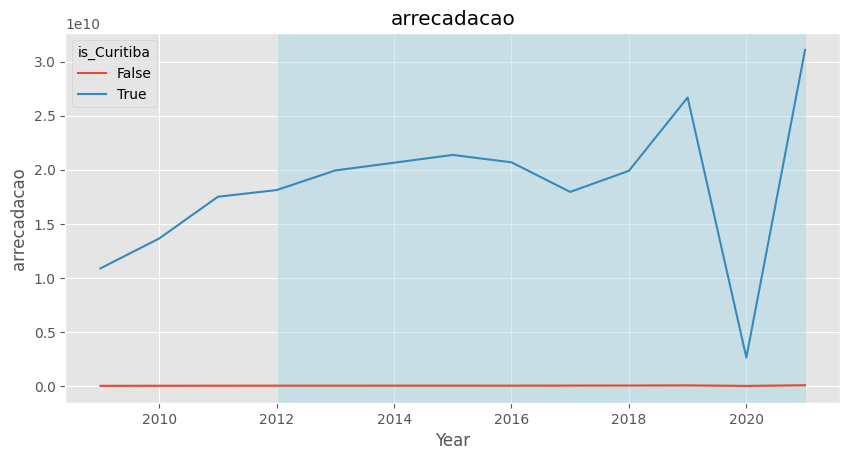

In [6]:
fig, ax = plt.subplots()
fig.set_figwidth(10)

sns.lineplot(x="Year", y="arrecadacao", hue="is_Curitiba", data=melt_df, ax=ax)

ax.axvspan(2012, 2021, alpha=0.5, color="lightblue")

plt.title("arrecadacao")
plt.show()

In [7]:
sdid = SynthDID(data, PRE_TEREM, POST_TEREM, TREATMENT)
sdid.fit(zeta_type="base")

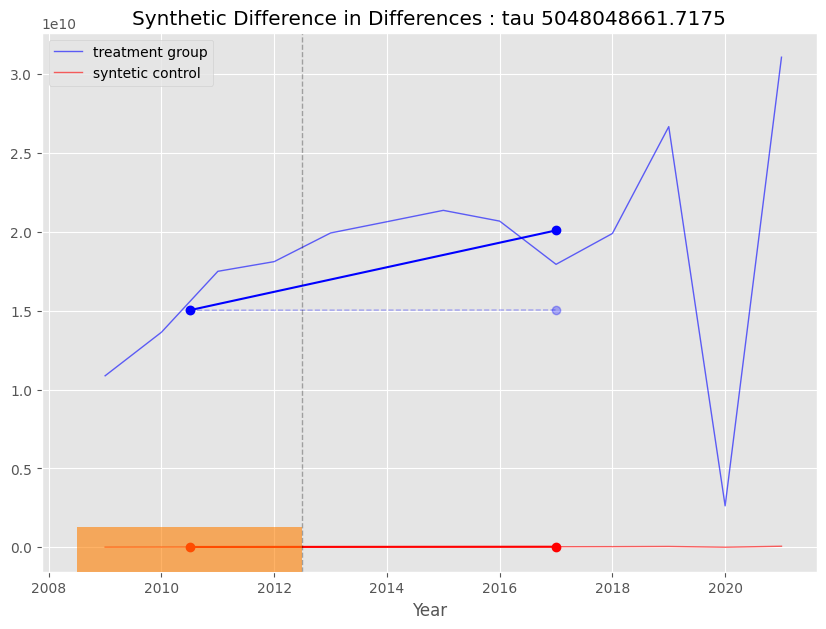

In [8]:
sdid.plot(model="sdid")

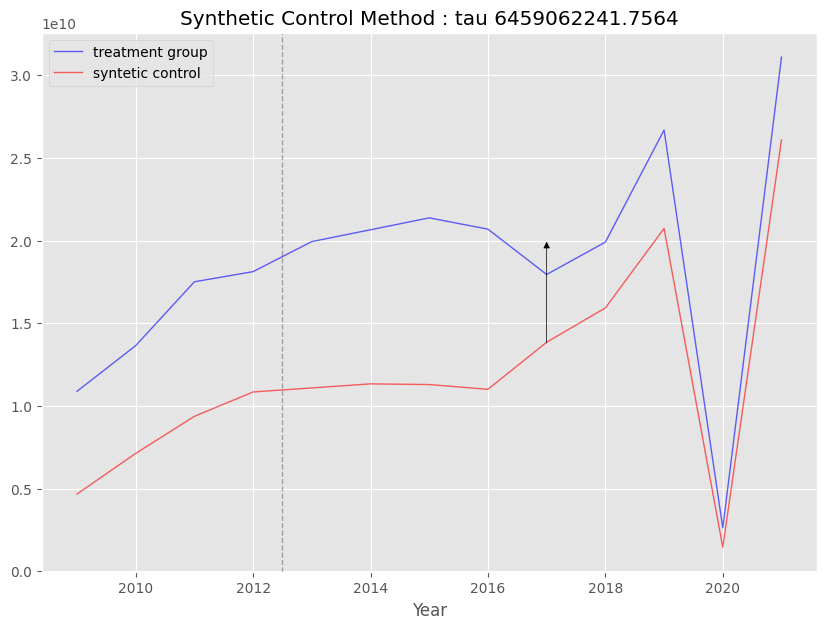

In [9]:
sdid.plot(model="sc")